# Notebook for comparison beween  Gevolution and class and agreement between class and hi-class

In [2]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
import scipy.integrate as integrate
from scipy.stats import kde

# ColorsI = ["red","blue","green","purple","darkcyan","gold","maroon","black","darkslategrey",
#            "darkgreen","navy","indigo","magenta","salmon","dodgerblue","springgreen","plum",
#            "cyan","khaki","lightcoral","gray"]
ColorsII = []
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'
ColorsI = ["red","blue","green","purple",'C1','navy','darkred']
ColorsII = ['darkred','purple','green','blue']

In [3]:
# addressGev_Hubbrange="./CSCS_Runs/New_BackReaction_Precise_14July2019/BackReaction_TEST/kev_cs2_e7_90000//output/";
addressGev_LargeBox="./CSCS_Runs/New_BackReaction_Precise_14July2019/BackReaction_TEST/kev_cs2_e7_9000///output/";
addressGev_Midrange="./CSCS_Runs/Full_simulations_20March2019-1280Mpc/1280-cs_e7-w09-Kevolution/output//";
addressGev_Smallrange="./CSCS_Runs//Runs-28Jan2019/Kevolution//300Boxsize-cs_e7-w09-Kevolution///output/";

zlist=np.array([100.0,50.0,20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.005,0.001,0.0,])
zrange=np.shape(zlist)[0]
Gev_lin_deltakess_z_all=[]
Gev_lin_chi = []
Gev_lin_zeta_zall=[]
Gev_lin_Hpi_zall=[]
Gev_lin_delta_m_zall=[]
Gev_lin_phi_zall=[]
Gev_lin_phi_prime_zall=[]
Gev_cross_zall=[]
# Gev_lin_phi_prime_zall

# for i in range(zrange):
#     Gev_lin_deltakess_z_all.append(np.loadtxt("./"+addressGev_Hubbrange+"/kess_pk_cs_e7_w09_Hubble"+str(i).zfill(3)+"_delta_kess.dat"))
#     Gev_lin_zeta_zall.append(np.loadtxt("./"+addressGev_Hubbrange+"/kess_pk_cs_e7_w09_Hubble"+str(i).zfill(3)+"_zeta.dat") )
#     Gev_lin_Hpi_zall.append(np.loadtxt("./"+addressGev_Hubbrange+"/kess_pk_cs_e7_w09_Hubble"+str(i).zfill(3)+"_pi_k.dat") )
#     Gev_lin_delta_m_zall.append(np.loadtxt("./"+addressGev_Hubbrange+"/kess_pk_cs_e7_w09_Hubble"+str(i).zfill(3)+"_delta.dat") )
#     Gev_lin_phi_zall.append(np.loadtxt("./"+addressGev_Hubbrange+"/kess_pk_cs_e7_w09_Hubble"+str(i).zfill(3)+"_phi.dat") )
#     Gev_lin_phi_prime_zall.append(np.loadtxt("./"+addressGev_Hubbrange+"/kess_pk_cs_e7_w09_Hubble"+str(i).zfill(3)+"_phi_prime.dat") )
#     Gev_lin_chi.append(np.loadtxt("./"+addressGev_Hubbrange+"/kess_pk_cs_e7_w09_Hubble"+str(i).zfill(3)+"_chi.dat") )

for i in range(zrange):
    Gev_lin_deltakess_z_all.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_delta_kess.dat"))
    Gev_lin_zeta_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_zeta.dat") )
    Gev_lin_Hpi_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_pi_k.dat") )
    Gev_lin_delta_m_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_delta.dat") )
    Gev_lin_phi_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_phi.dat") )
    Gev_lin_phi_prime_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_phi_prime.dat") )
    Gev_lin_chi.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_chi.dat") )
for i in range(zrange):
    Gev_lin_deltakess_z_all.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_delta_kess.dat"))
    Gev_lin_zeta_zall.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_zeta.dat") )
    Gev_lin_Hpi_zall.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_pi_k.dat") )
    Gev_lin_delta_m_zall.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_delta.dat") )
    Gev_lin_phi_zall.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_phi.dat") )
    Gev_lin_phi_prime_zall.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_phi_prime.dat") )
    Gev_lin_chi.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_chi.dat") )

for i in range(zrange):
    Gev_lin_deltakess_z_all.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e7w09_small_"+str(i).zfill(3)+"_delta_kess.dat"))
    Gev_lin_zeta_zall.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e7w09_small_"+str(i).zfill(3)+"_zeta.dat") )
    Gev_lin_Hpi_zall.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e7w09_small_"+str(i).zfill(3)+"_pi_k.dat") )
    Gev_lin_delta_m_zall.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e7w09_small_"+str(i).zfill(3)+"_delta.dat") )
    Gev_lin_phi_zall.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e7w09_small_"+str(i).zfill(3)+"_phi.dat") )
    Gev_lin_phi_prime_zall.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e7w09_small_"+str(i).zfill(3)+"_phi_prime.dat") )
#     Gev_lin_phi_prime_zall.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e7w09_small_"+str(i).zfill(3)+"_phi_prime.dat") )
    Gev_cross_zall.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e7w09_small_"+str(i).zfill(3)+"_deltakess_deltam.dat") )
    Gev_lin_chi.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e7w09_small_"+str(i).zfill(3)+"_chi.dat") )

Class_all=[]
Class_pk_all=[]

# # Backgrounds:
# bg_Gevolution_Hubblesize=np.loadtxt("./"+addressGev_HubbleBox+"/kess_cs_e2_w09_large_background.dat")
bg_Gevolution_lin_LargeBox=np.loadtxt("./"+addressGev_LargeBox+"/kess_cs_e2_w09_large_background.dat")
# bg_Gevolution_lin_midrange=np.loadtxt("./"+addressGev_Midrange+"/kess_cs_e2_w09_large_background.dat")

bg_class=np.loadtxt("./Class_Gev_IC/class_cs2_07_w09/Output/class_kess_cs_e7_w_09_newt_background.dat")
Class_all=[]
Class_phi_prime=[]
# Class_pk_all=[]
# zlist_class=[ 100 , 50, 20, 10 , 6 , 5 , 4, 3, 2 , 1 , 0]
# zlist_class=zlist
zlist_class=np.array([100.0,50.0,20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.005,0.001,0.0,])

# zlist_phiprime=[ 100 , 50, 20, 10 , 6 , 5 , 4, 3, 2 , 1 , 0]
class_high="./Class_Gev_IC/class_cs2_07_w09/";

for i in range(np.shape(zlist_class)[0]):
    Class_all.append(np.loadtxt(class_high+"/Class_kess_cs2_e7_w_09_z"+str(zlist_class[i])+"_newt.dat"))
    #     Class_pk_all.append(np.loadtxt(class_high+"/class_kess_cs_e3_newt_z"+str(i+1)+"_pk.dat"))
# for i in range(np.shape(zlist_phiprime)[0]):    
#     Class_phi_prime.append(np.loadtxt(class_high+"/Class_cs_e3_w0.9/Kessence_field_class_phi_prime_z"+str(zlist_phiprime[i])+".dat"))
maxNum=np.shape(zlist_class)[0]

z_list=zlist_class

# Background test

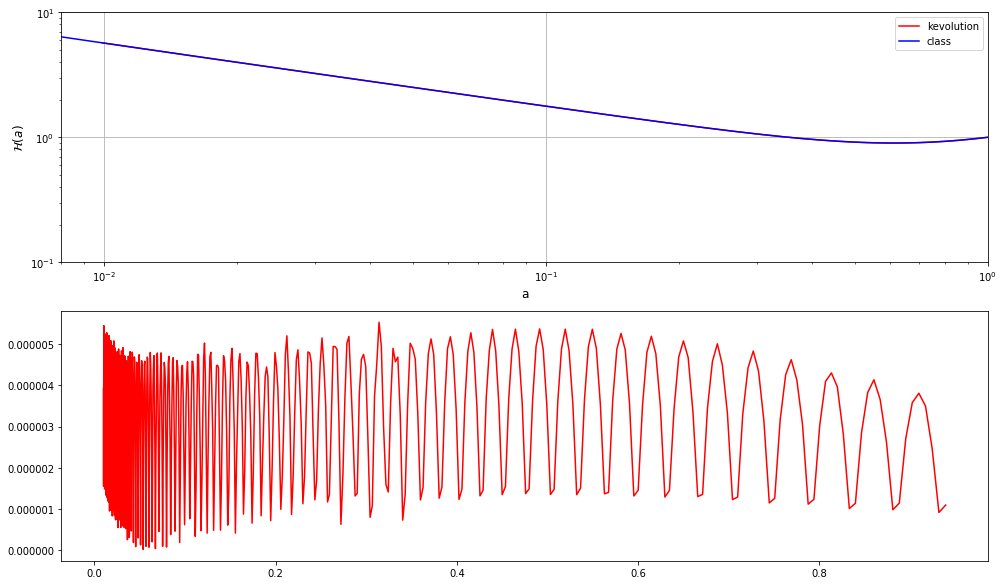

In [4]:
#################################
#################################
# Cosmological parameters.

As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s
# Boxsize=320.;
# c_gev=2997.92458; #[100km/s]
# H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
# print("H0[1/Mpc]=100h/c: ",H0);
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
H_list=[]
a_list=1./(1.+zlist)
Class_Phi_power_zall=[]

H_list=(Hubble_conf_Mpc(1./(1.+zlist[i])))
#     Class_Phi_power_zall.append(As*(class_phi_kess_zall[i][:,7])**2 *((class_phi_kess_zall[i][:,0]/kp)**(ns-1.)) );
# np.shape(Class_Phi_power_zall)

#Plot setting
plt.figure(figsize=(14,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 13)
plt.subplot(211)
#plt.loglog(bg_Gevolution_lin[:,2],2.*np.abs(np.exp(interp_field_bg_lin(np.log(bg_Gevolution_lin[:,2])))-bg_Gevolution_lin[:,3])/(bg_Gevolution_lin[:,3]+np.exp(interp_field_bg_lin(np.log(bg_Gevolution_lin[:,2])))),".",color="olive",
#           label=r"2|$\frac{\mathcal{H}(fluid)-\mathcal{H}(field)}{\mathcal{H}(fluid)+\mathcal{H}(field)}|$")
aclass_cs_e3=1./(1+bg_class[:,0])
a=np.arange(0.001,2,0.0001)
plt.loglog(bg_Gevolution_lin_LargeBox[:,2],bg_Gevolution_lin_LargeBox[:,3],color="red",
           label="kevolution")
plt.plot(aclass_cs_e3,bg_class[:,3]*aclass_cs_e3/Hubble_conf_Mpc(1.),color="blue",
           label="class")
plt.xlim(8e-3,1)
plt.ylim(1e-1,10)
plt.xlabel("a",fontsize=12)
plt.ylabel(r"$\mathcal{H}(a)$",fontsize=12)
# plt.ylabel('log')
# plt.xlabel('log')

plt.legend()
plt.grid(True)
plt.tight_layout()

Hubble_interp=[]
interp_Hubble=(interp1d(aclass_cs_e3[:],bg_class[:,3]*aclass_cs_e3/Hubble_conf_Mpc(1.)) )
Hubble_interp=(interp_Hubble(bg_Gevolution_lin_LargeBox[:-10,2]) )

plt.subplot(212)
plt.plot(bg_Gevolution_lin_LargeBox[:-10,2],np.abs(bg_Gevolution_lin_LargeBox[:-10,3]-Hubble_interp[:])/Hubble_interp[:],color="red",label="fluid")
# plt.ylim(-1e-7,1e-7)

plt.show()

In [5]:
class_zall_interp_deltam_Hubble=[]
class_zall_interp_deltam_LargeBox=[]
class_zall_interp_deltam_Mid=[]

class_zall_interp_deltakess_Hubble=[]
class_zall_interp_deltakess_LargeBox=[]
class_zall_interp_deltakess_Mid=[]

class_zall_interp_phi_Hubble=[]
class_zall_interp_phi_LargeBox=[]
class_zall_interp_phi_Mid=[]

class_zall_interp_phi_prime_Hubble=[]
class_zall_interp_phi_prime_LargeBox=[]
class_zall_interp_phi_prime_Mid=[]

for i in range(0,zrange):
    interp_class_deltam=(interp1d(Class_all[i][:,0],Class_all[i][:,7]) )
    interp_class_deltam_Large=(interp1d(Class_all[i][:,0],Class_all[i][:,7]) )
    interp_class_deltam_Mid=(interp1d(Class_all[i][:,0],Class_all[i][:,7]) )

    interp_class_deltakess=(interp1d(Class_all[i][:,0],Class_all[i][:,3]) )
    interp_class_deltakess_Large=(interp1d(Class_all[i][:,0],Class_all[i][:,3]) )
    interp_class_deltakess_Mid=(interp1d(Class_all[i][:,0],Class_all[i][:,3]) )

    interp_class_phi=(interp1d(Class_all[i][:,0],Class_all[i][:,5]) )
    interp_class_phi_Large=(interp1d(Class_all[i][:,0],Class_all[i][:,5]) )
    interp_class_phi_Mid=(interp1d(Class_all[i][:,0],Class_all[i][:,5]) )
    
#     interp_class_phi_prime=(interp1d(Class_phi_prime[i][:,0],Class_phi_prime[i][:,1]) )

    class_zall_interp_deltam_Hubble.append(interp_class_deltam(Gev_lin_delta_m_zall[i][:,0]))
    class_zall_interp_deltam_LargeBox.append(interp_class_deltam(Gev_lin_delta_m_zall[i+zrange][:,0]))
    class_zall_interp_deltam_Mid.append(interp_class_deltam(Gev_lin_delta_m_zall[i+22][:,0]) )

    class_zall_interp_deltakess_Hubble.append(interp_class_deltakess(Gev_lin_deltakess_z_all[i][:,0]) )
    class_zall_interp_deltakess_LargeBox.append(interp_class_deltakess(Gev_lin_deltakess_z_all[i+zrange][:,0]) )
    class_zall_interp_deltakess_Mid.append(interp_class_deltakess(Gev_lin_deltakess_z_all[i+22][:,0]) )

    class_zall_interp_phi_Hubble.append(interp_class_phi(Gev_lin_phi_zall[i][:,0]) )
    class_zall_interp_phi_LargeBox.append(interp_class_phi(Gev_lin_phi_zall[i+zrange][:,0]) )
    class_zall_interp_phi_Mid.append(interp_class_phi(Gev_lin_phi_zall[i+22][:zrange,0]) )

#     class_zall_interp_phi_prime_Hubble.append(interp_class_phi_prime(Gev_lin_phi_prime_zall[i][:,0]) )
#     class_zall_interp_phi_prime_LargeBox.append(interp_class_phi_prime(Gev_lin_phi_prime_zall[i+11][:,0]) )
#     class_zall_interp_phi_prime_Mid.append(interp_class_phi_prime(Gev_lin_phi_prime_zall[i+22][:,0]) )

# Making mu2

In [6]:

As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s

H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
mu_class_mid=[]
mu_kev_mid=[]
mu_class_large=[]
mu_kev_large=[]
mu_class_Hubble=[]
mu_kev_Hubble=[]


# for i in range (maxNum-1,maxNum):
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
Omega_rad=9.1671353942930788e-05
Omega_kessence=1.-Omega_m-Omega_rad
w=-0.9;
a_list=1./(1.+zlist)
H_list=(Hubble_conf_Mpc(1./(1.+zlist)))
for i in range (maxNum):
     #Hubble
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
    mu_class0=1.+np.abs(coeff*class_zall_interp_deltakess_Hubble[i][:]/class_zall_interp_deltam_Hubble[i][:])
    mu_class_Hubble.append(mu_class0);
    
    
    mu_kev0=  1.+ np.abs(coeff*np.sqrt(Gev_lin_deltakess_z_all[i][:,1])/np.sqrt(Gev_lin_delta_m_zall[i][:,1]))
    mu_kev_Hubble.append(mu_kev0)
    
    
    #Large
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
    mu_class0=1.+(coeff*class_zall_interp_deltakess_LargeBox[i][:]/class_zall_interp_deltam_LargeBox[i][:])
    mu_class_large.append(mu_class0);
    
    mu_kev0=  1.+ (coeff*np.sqrt(Gev_lin_deltakess_z_all[i+zrange][:,1])/np.sqrt(Gev_lin_delta_m_zall[i+zrange][:,1]))
    mu_kev_large.append(mu_kev0)
    
# #     #mid range
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
    mu_class0=1.+(coeff*class_zall_interp_deltakess_Mid[i][:]/class_zall_interp_deltam_Mid[i][:])
    mu_class_mid.append(mu_class0);
    
    mu_kev0=  1.+ (coeff*np.sqrt(Gev_lin_deltakess_z_all[i+zrange*2][:,1])/np.sqrt(Gev_lin_delta_m_zall[i+zrange*2][:,1]))
    mu_kev_mid.append(mu_kev0)
    

In [7]:

As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s

H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
mu_class_mid=[]
mu_kev_mid=[]
mu_class_large=[]
mu_kev_large=[]
mu_class_Hubble=[]
mu_kev_Hubble=[]


# for i in range (maxNum-1,maxNum):
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
Omega_rad=9.1671353942930788e-05
Omega_kessence=1.-Omega_m-Omega_rad
w=-0.9;
a_list=1./(1.+zlist)
H_list=(Hubble_conf_Mpc(1./(1.+zlist)))
for i in range (maxNum):
     #Hubble
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
    mu_class0=1.+np.abs(coeff*class_zall_interp_deltakess_Hubble[i][:]/class_zall_interp_deltam_Hubble[i][:])
    mu_class_Hubble.append(mu_class0);
    
    
    mu_kev0=  1.+ np.abs(coeff*np.sqrt(Gev_lin_deltakess_z_all[i][:,1])/np.sqrt(Gev_lin_delta_m_zall[i][:,1]))
    mu_kev_Hubble.append(mu_kev0)
    
    
    #Large
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
    mu_class0=1.+(coeff*class_zall_interp_deltakess_LargeBox[i][:]/class_zall_interp_deltam_LargeBox[i][:])
    mu_class_large.append(mu_class0);
    
    mu_kev0=  1.+ (coeff*np.sqrt(Gev_lin_deltakess_z_all[i+zrange][:,1])/np.sqrt(Gev_lin_delta_m_zall[i+zrange][:,1]))
    mu_kev_large.append(mu_kev0)
    
# #     #mid range
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
    mu_class0=1.+(coeff*class_zall_interp_deltakess_Mid[i][:]/class_zall_interp_deltam_Mid[i][:])
    mu_class_mid.append(mu_class0);
    
    mu_kev0=  1.+ (coeff*np.sqrt(Gev_lin_deltakess_z_all[i+zrange*2][:,1])/np.sqrt(Gev_lin_delta_m_zall[i+zrange*2][:,1]))
    mu_kev_mid.append(mu_kev0)

# Fitting Tanh

In [8]:
from scipy.optimize import curve_fit
# from scipy import optimize
Best_fits=[]
k_min=1
init_vals = [  0.025,  2.2,-1.26];  # for [amp, cen, wid]
for i in range (zrange):# for [amp, cen, wid]
    def tanhyp(x,alpha, beta, gamma):
        return -alpha*(np.tanh(beta*(np.log10(x) -gamma))) +alpha 
    best_vals, covar = curve_fit(tanhyp, (Gev_lin_phi_zall[i][k_min:,0]), mu_kev_Hubble[i][k_min:]-1, p0=init_vals)
    Best_fits.append(best_vals)
    #     print(best_vals)


# Class fitting

In [9]:
k_min=12

Best_fits_class=[]
# Gev_lin_phi_zall[i][k_min:],mu_class_Hubble[i][k_min:]-1
for i in range (zrange):
    init_vals_2 =[  0.022,  2.85,0.28];  # for [amp, cen, wid]
#     def tanhyp(x,alpha, beta, gamma):
#         return -alpha*(np.tanh(beta*(np.log10(x) -gamma))) +alpha 
    best_vals, covar = curve_fit(tanhyp, (Gev_lin_phi_zall[i][k_min:,0]), mu_class_Hubble[i][k_min:]-1, p0=init_vals_2)
    Best_fits_class.append(best_vals)
    #     print(best_vals)


In [10]:
Best_fits_class = np.array(Best_fits_class)
Best_fits = np.array(Best_fits)

# Log alpha vs beta

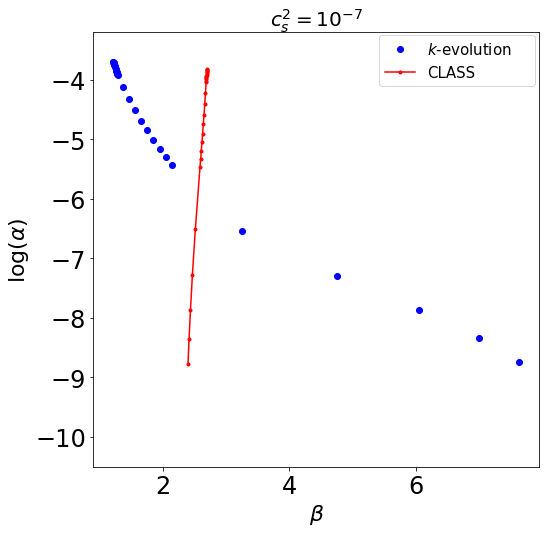

In [15]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
fig= plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)
# kk=0
kk=4
plt.plot(Best_fits[kk:,1],np.log(Best_fits[kk:,0]),"o",label=r"$k$-evolution",lw=1.5,color="blue")
plt.plot(Best_fits_class[kk:,1],np.log(Best_fits_class[kk:,0]),".-",lw=1.5,label=r"CLASS",color="red")

# axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
# axins.imshow(Z2, extent=extent, interpolation="nearest",
#              origin="lower")
plt.legend(bbox_to_anchor=(0.64, 0.89,0.35, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.ylim(-10.5,-3.2)

plt.xlabel(r"$\beta$",fontsize=22)
plt.ylabel(r"$\log(\alpha)$",fontsize=22)

# plt.xscale('log')
# plt.yscale('log')
plt.title( r"$c_s^2 =10^{-7}$",fontsize=20)

# plt.loglog(1+z_list[:],Best_fits_class[:,1])
# plt.loglog(1+z_list[:],-(Best_fits_class[:,2]))
# plt.legend()
plt.savefig('logalpha_beta_cs2_7.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.show()

# Log alpha vs gamma

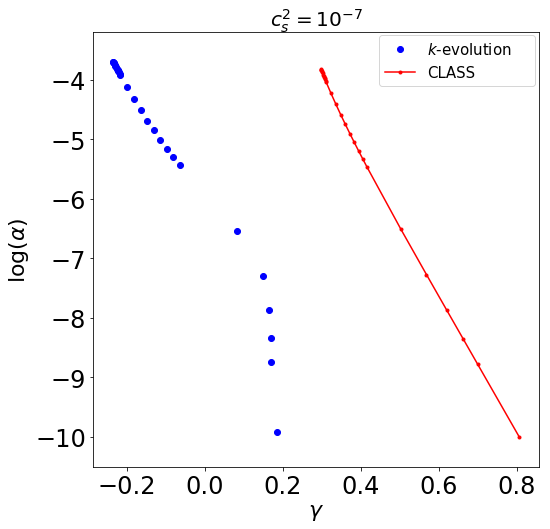

In [16]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
fig= plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)
# kk=0
kk=3
plt.plot(Best_fits[kk:,2],np.log(Best_fits[kk:,0]),"o",label=r"$k$-evolution",lw=1.5,color="blue")
plt.plot(Best_fits_class[kk:,2],np.log(Best_fits_class[kk:,0]),".-",lw=1.5,label=r"CLASS",color="red")

# axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
# axins.imshow(Z2, extent=extent, interpolation="nearest",
#              origin="lower")
plt.legend(bbox_to_anchor=(0.64, 0.89,0.35, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
# plt.ylim(-0.5,12)

plt.xlabel(r"$\gamma$",fontsize=22)
plt.ylabel(r"$\log(\alpha)$",fontsize=22)

# plt.xscale('log')
# plt.yscale('log')
plt.ylim(-10.5,-3.2)
plt.title( r"$c_s^2 =10^{-7}$",fontsize=20)

# plt.loglog(1+z_list[:],Best_fits_class[:,1])
# plt.loglog(1+z_list[:],-(Best_fits_class[:,2]))
# plt.legend()
plt.savefig('logalpha_gamma_cs2_7.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.show()

# beta vs gamma

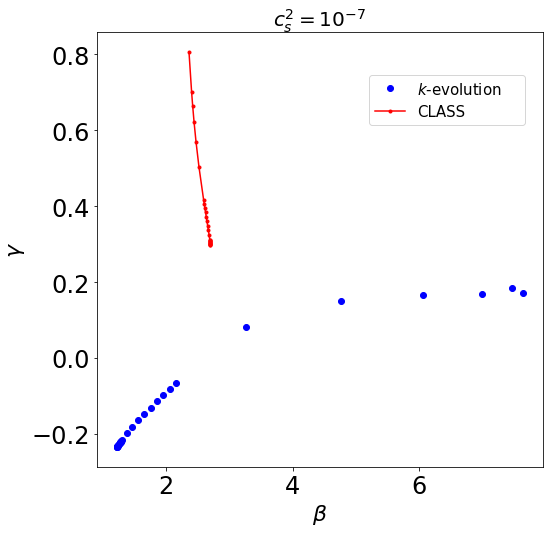

In [17]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
fig= plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)
# kk=0
kk=3
plt.plot(Best_fits[kk:,1],Best_fits[kk:,2],"o",label=r"$k$-evolution",lw=1.5,color="blue")
plt.plot(Best_fits_class[kk:,1],Best_fits_class[kk:,2],".-",lw=1.5,label=r"CLASS",color="red")

# axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
# axins.imshow(Z2, extent=extent, interpolation="nearest",
#              origin="lower")
plt.legend(bbox_to_anchor=(0.61, 0.80,0.35, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
# plt.ylim(-0.5,12)

plt.xlabel(r"$\beta$",fontsize=22)
plt.ylabel(r"$\gamma$",fontsize=22)

# plt.xscale('log')
# plt.yscale('log')
plt.title( r"$c_s^2 =10^{-7}$",fontsize=20)

# plt.loglog(1+z_list[:],Best_fits_class[:,1])
# plt.loglog(1+z_list[:],-(Best_fits_class[:,2]))
# plt.legend()
plt.savefig('beta_gamma_cs2_7.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.show()

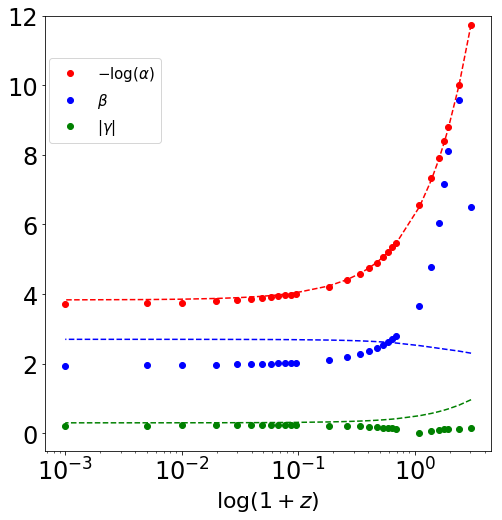

In [15]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
fig= plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)
# kk=0
kk=
plt.plot(np.log(z_list[kk:]+1),-np.log(Best_fits[kk:,0]),"o",label=r"$- \log(\alpha)$",lw=1.5,color="red")
plt.plot(np.log(z_list[kk:]+1),Best_fits[kk:,1],"o",label=r"$\beta$",lw=1.5,color="blue")
plt.plot(np.log(z_list[kk:]+1),np.abs(Best_fits[kk:,2]),"o",label=r"$|\gamma|$",lw=1.5,color="green")

plt.plot(np.log(z_list[kk:]+1),-np.log(Best_fits_class[kk:,0]),lw=1.5,linestyle='dashed',color="red")
plt.plot(np.log(z_list[kk:]+1),Best_fits_class[kk:,1],lw=1.5,linestyle='dashed',color="blue")
plt.plot(np.log(z_list[kk:]+1),np.abs(Best_fits_class[kk:,2]),lw=1.5,linestyle='dashed',color="green")

# axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
# axins.imshow(Z2, extent=extent, interpolation="nearest",
#              origin="lower")
plt.legend(bbox_to_anchor=(0.01, 0.80,0.25, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.ylim(-0.5,12)

plt.xlabel(r"$\log(1+z)$",fontsize=22)
plt.xscale('log')
# plt.yscale('log')

# plt.loglog(1+z_list[:],Best_fits_class[:,1])
# plt.loglog(1+z_list[:],-(Best_fits_class[:,2]))
# plt.legend()
# plt.savefig('fitting_cs2_7_values.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.show()

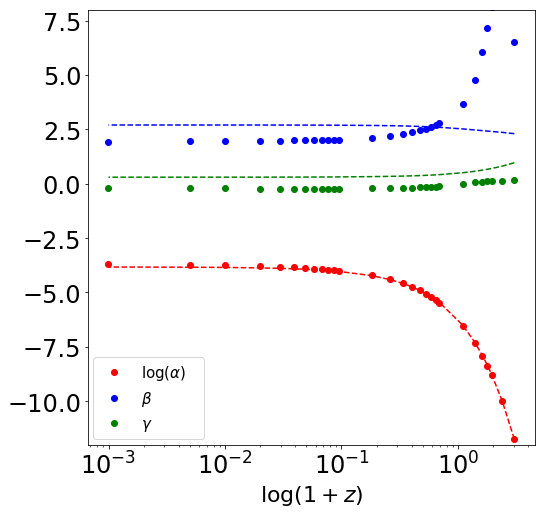

In [52]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
fig= plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)
# kk=0
kk=2
plt.plot(np.log(z_list[kk:]+1),np.log(Best_fits[kk:,0]),"o",label=r"$ \log(\alpha)$",lw=1.5,color="red")
plt.plot(np.log(z_list[kk:]+1),Best_fits[kk:,1],"o",label=r"$\beta$",lw=1.5,color="blue")
plt.plot(np.log(z_list[kk:]+1),(Best_fits[kk:,2]),"o",label=r"$\gamma$",lw=1.5,color="green")

plt.plot(np.log(z_list[kk:]+1),np.log(Best_fits_class[kk:,0]),lw=1.5,linestyle='dashed',color="red")
plt.plot(np.log(z_list[kk:]+1),Best_fits_class[kk:,1],lw=1.5,linestyle='dashed',color="blue")
plt.plot(np.log(z_list[kk:]+1),(Best_fits_class[kk:,2]),lw=1.5,linestyle='dashed',color="green")

# axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
# axins.imshow(Z2, extent=extent, interpolation="nearest",
#              origin="lower")
plt.legend(bbox_to_anchor=(0.01, 0.10,0.25, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.ylim(-12,8)

plt.xlabel(r"$\log(1+z)$",fontsize=22)
plt.xscale('log')
# plt.yscale('log')

# plt.loglog(1+z_list[:],Best_fits_class[:,1])
# plt.loglog(1+z_list[:],-(Best_fits_class[:,2]))
# plt.legend()
plt.savefig('fitting_cs2_7_values_1.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.show()

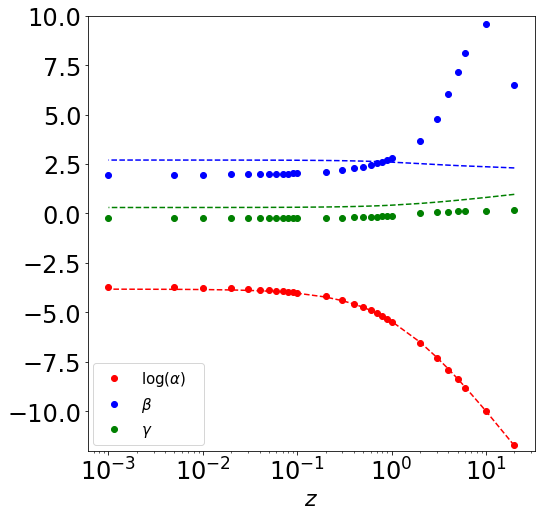

In [58]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
fig= plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)
# kk=0
kk=2
plt.plot((z_list[kk:]),np.log(Best_fits[kk:,0]),"o",label=r"$ \log(\alpha)$",lw=1.5,color="red")
plt.plot((z_list[kk:]),Best_fits[kk:,1],"o",label=r"$\beta$",lw=1.5,color="blue")
plt.plot((z_list[kk:]),(Best_fits[kk:,2]),"o",label=r"$\gamma$",lw=1.5,color="green")

plt.plot((z_list[kk:]),np.log(Best_fits_class[kk:,0]),lw=1.5,linestyle='dashed',color="red")
plt.plot((z_list[kk:]),Best_fits_class[kk:,1],lw=1.5,linestyle='dashed',color="blue")
plt.plot((z_list[kk:]),(Best_fits_class[kk:,2]),lw=1.5,linestyle='dashed',color="green")

# axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
# axins.imshow(Z2, extent=extent, interpolation="nearest",
#              origin="lower")
plt.legend(bbox_to_anchor=(0.01, 0.10,0.25, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.ylim(-12,10)

plt.xlabel(r"$z$",fontsize=22)
plt.xscale('log')
# plt.yscale('log')

# plt.loglog(1+z_list[:],Best_fits_class[:,1])
# plt.loglog(1+z_list[:],-(Best_fits_class[:,2]))
# plt.legend()
plt.savefig('fitting_cs2_7_values_1.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.show()

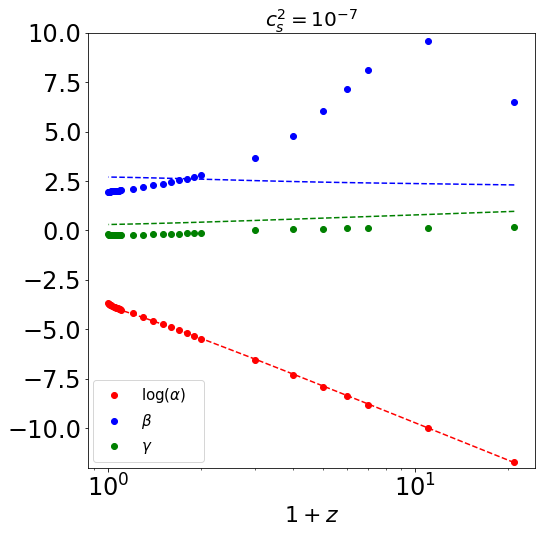

In [26]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
fig= plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)
# kk=0
kk=2
plt.plot((z_list[kk:]+1),np.log(Best_fits[kk:,0]),"o",label=r"$ \log(\alpha)$",lw=1.5,color="red")
plt.plot((z_list[kk:]+1),Best_fits[kk:,1],"o",label=r"$\beta$",lw=1.5,color="blue")
plt.plot((z_list[kk:]+1),(Best_fits[kk:,2]),"o",label=r"$\gamma$",lw=1.5,color="green")

plt.plot((z_list[kk:]+1),np.log(Best_fits_class[kk:,0]),lw=1.5,linestyle='dashed',color="red")
plt.plot((z_list[kk:]+1),Best_fits_class[kk:,1],lw=1.5,linestyle='dashed',color="blue")
plt.plot((z_list[kk:]+1),(Best_fits_class[kk:,2]),lw=1.5,linestyle='dashed',color="green")

# axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
# axins.imshow(Z2, extent=extent, interpolation="nearest",
#              origin="lower")
plt.legend(bbox_to_anchor=(0.01, 0.10,0.25, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.ylim(-12,10)

plt.xlabel(r"$1+z$",fontsize=22)
plt.xscale('log')
# plt.yscale('log')
plt.title( r"$c_s^2 =10^{-7}$",fontsize=20)

# plt.loglog(1+z_list[:],Best_fits_class[:,1])
# plt.loglog(1+z_list[:],-(Best_fits_class[:,2]))
# plt.legend()
plt.savefig('fitting_cs2_7_values_v3.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.show()

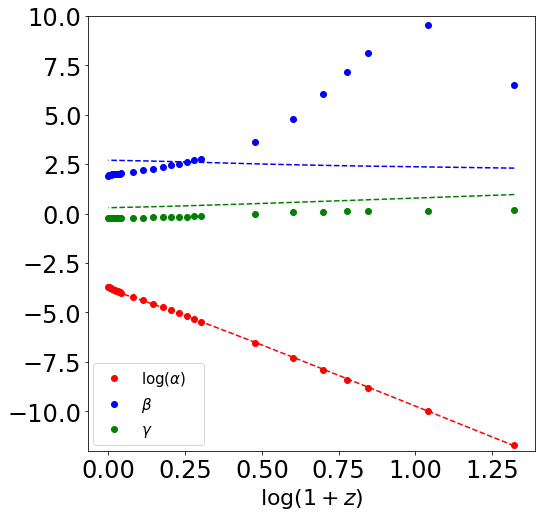

In [20]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
####
fig= plt.figure(figsize=(8,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
plt.figure(1)
# kk=0
kk=2
plt.plot(np.log10(z_list[kk:]+1),np.log(Best_fits[kk:,0]),"o",label=r"$ \log(\alpha)$",lw=1.5,color="red")
plt.plot(np.log10(z_list[kk:]+1),Best_fits[kk:,1],"o",label=r"$\beta$",lw=1.5,color="blue")
plt.plot(np.log10(z_list[kk:]+1),(Best_fits[kk:,2]),"o",label=r"$\gamma$",lw=1.5,color="green")

plt.plot(np.log10(z_list[kk:]+1),np.log(Best_fits_class[kk:,0]),lw=1.5,linestyle='dashed',color="red")
plt.plot(np.log10(z_list[kk:]+1),Best_fits_class[kk:,1],lw=1.5,linestyle='dashed',color="blue")
plt.plot(np.log10(z_list[kk:]+1),(Best_fits_class[kk:,2]),lw=1.5,linestyle='dashed',color="green")

# axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
# axins.imshow(Z2, extent=extent, interpolation="nearest",
#              origin="lower")
plt.legend(bbox_to_anchor=(0.01, 0.10,0.25, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.ylim(-12,10)

plt.xlabel(r"$\log(1+z)$",fontsize=22)
# plt.xscale('log')
# plt.yscale('log')

# plt.loglog(1+z_list[:],Best_fits_class[:,1])
# plt.loglog(1+z_list[:],-(Best_fits_class[:,2]))
# plt.legend()
plt.savefig('fitting_cs2_7_values_v2.jpg', format='jpg',dpi=400, bbox_inches='tight' )

plt.show()